Capstone-Guided-Step 2
Python script:  Life_expectancy.ipynb

In [1]:
### Part-1 Get modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Part-6 ### Saved for plotting and other

In [3]:
### Part-2 Get for 2015 
### colNames = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
### 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', GDP', 'Population','Income composition of resources', 'Schooling', 'Life expectancy']
### df = pd.read_csv("life_expectancy.csv" , names=colNames)
df = pd.read_csv("life_expectancy.csv" )
print(df.shape, '<--before')
df = include = df[df['Year'] == 2015]

df2 = df  ###. saved  to re use "Country and "Status ( strigs) df2..df2..df2

print(df.shape, '<--After')
### print(df.head(30))

(2938, 22) <--before
(183, 22) <--After


In [4]:
### Part-3 drop columns
### drop columns cause issues being non-numeric and columns could not be used
print(df.columns)
df = df.drop(['Alcohol','Measles ', 'under-five deaths ', 'Polio', 'percentage expenditure'], axis=1)
df = df.drop(['Country', 'Status', 'Total expenditure', ' HIV/AIDS' ], axis=1)
df = df.drop([' thinness  1-19 years', ' thinness 5-9 years', ], axis=1)
df.shape

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


(183, 11)

In [5]:
### Part-4 ### replace NANs & Nulls with mean
df.isnull().sum()

for column, value in df.items():
     if df[column].dtype == np.number:
         df[column] = df[column].fillna(df[column].mean())

df.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Hepatitis B                        0
 BMI                               0
Diphtheria                         0
GDP                                0
Population                         0
Income composition of resources    0
Schooling                          0
dtype: int64

In [6]:
### Part-5 reorder columns to  make "Life expectancy the target (y)", the last column
df.columns
df = df.reindex(columns= ['Year', 'Adult Mortality',
       'infant deaths', 'Hepatitis B', ' BMI ', 'Diphtheria ', 'GDP',
       'Population', 'Income composition of resources', 'Schooling', 'Life expectancy '])
df.columns

Index(['Year', 'Adult Mortality', 'infant deaths', 'Hepatitis B', ' BMI ',
       'Diphtheria ', 'GDP', 'Population', 'Income composition of resources',
       'Schooling', 'Life expectancy '],
      dtype='object')

In [7]:
### Part-7 ### create model X-features and y target
print(df.shape)
print(df.columns)
X = df.drop(['Life expectancy '],axis=1).values
y = df[['Life expectancy ']]
y = np.ravel(y)   ### 2d array to horizontal 1d array
### print(y)
### print(X)

(183, 11)
Index(['Year', 'Adult Mortality', 'infant deaths', 'Hepatitis B', ' BMI ',
       'Diphtheria ', 'GDP', 'Population', 'Income composition of resources',
       'Schooling', 'Life expectancy '],
      dtype='object')


In [8]:
### part-8:  80% for training and 20% for testing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regressor.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
y_pred = regressor.predict(X_test)
### print(pred)

In [9]:
### Scatter plots and correlations
### print(df2.columns)
X1 = df2.loc[:,['Country']]           
X2 = df2.loc[:,['Status']]
X3 = df2.loc[:,['Life expectancy ']]      
X4 = df2.loc[:,['Adult Mortality']]   ### has a strong negative relation(-.79)
X5 = df2.loc[:,['infant deaths']]     ### has no relation
X6 = df2.loc[:,[' BMI ']]             ### has  relation (52% )
X7 = df2.loc[:,['GDP']]               ### has some  relation
X8 = df2.loc[:,['Schooling']]         ### has good positive relation (82%)

In [10]:
### Correlation between Adult Mortality and life expectancy
print()
correlation = df2['Adult Mortality'].corr(df2['Life expectancy '])
print(correlation, 'Correlation between Adult Mortality and Life expectancy')
print()
### Correlation between Infant Deaths and life expectancy
print()
correlation = df2['infant deaths'].corr(df2['Life expectancy '])
print(correlation, 'Correlation between Infant Deaths and Life expectancy')
print()
### Correlation between BMI and life expectancy
print()
correlation = df2[' BMI '].corr(df2['Life expectancy '])
print(correlation, 'Correlation between Body Mass Index and Life expectancy')
print()
### Correlation between GDP and life expectancy
print()
correlation = df2['GDP'].corr(df2['Life expectancy '])
print(correlation, 'Correlation between GDP and Life expectancy')
print()
### Correlation between Schooling and life expectancy
print()
correlation = df2['Schooling'].corr(df2['Life expectancy '])
print(correlation, 'Correlation between Schooling and Life expectancy')
print()


-0.7791194739614956 Correlation between Adult Mortality and Life expectancy


-0.2412895446711374 Correlation between Infant Deaths and Life expectancy


0.5166630677405107 Correlation between Body Mass Index and Life expectancy


0.45449101339989056 Correlation between GDP and Life expectancy


0.8181594367888713 Correlation between Schooling and Life expectancy



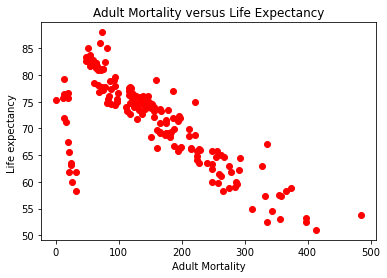

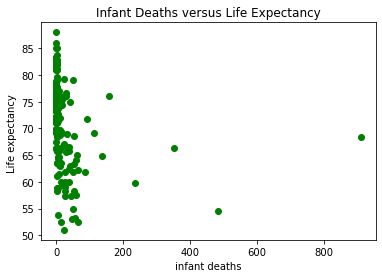

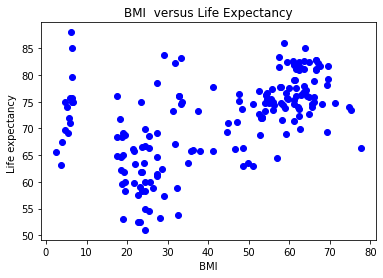

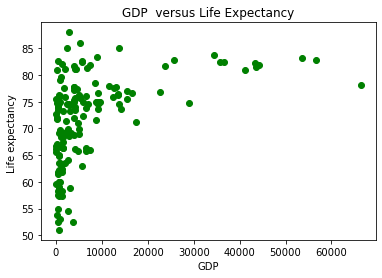

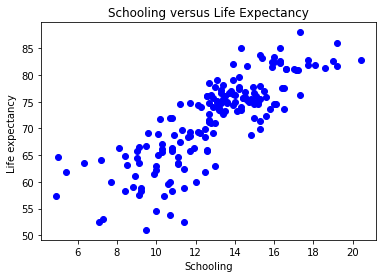

In [11]:
###++++++++++++++++++++++++++
### plt.scatter(X1, y, color = 'blue')
### plt.title('Country versus Life Expectancy')
### plt.xlabel('Country')
### plt.ylabel('Life expectancy ')
### plt.show()
###++++++++++++++++++++++++++
### plt.scatter(X2, y, color = 'red')
### plt.title('Status versus Life Expectancy')
### plt.xlabel('Status')
### plt.ylabel('Life expectancy ')
### plt.show()
###++++++++++++++++++++++++++
plt.scatter(X4, y, color = 'red')
plt.title('Adult Mortality versus Life Expectancy')
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy ')
plt.show()
###++++++++++++++++++++++++++
plt.scatter(X5, y, color = 'green')
plt.title('Infant Deaths versus Life Expectancy')
plt.xlabel('infant deaths')
plt.ylabel('Life expectancy ')
plt.show()
###++++++++++++++++++++++++++
plt.scatter(X6, y, color = 'blue')
plt.title('BMI  versus Life Expectancy')
plt.xlabel(' BMI ')
plt.ylabel('Life expectancy ')
plt.show()
###++++++++++++++++++++++++++
plt.scatter(X7, y, color = 'green')
plt.title('GDP  versus Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life expectancy ')
plt.show()
###++++++++++++++++++++++++++
plt.scatter(X8, y, color = 'blue')
plt.title('Schooling versus Life Expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life expectancy ')
plt.show()
###++++++++++++++++++++++++++

In [12]:
### now process the df2 saved for plots
print(df2.columns)
df2_sorted = df2.sort_values(by= 'Life expectancy ', ascending=True)
df2_sorted.head(400)   

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2297,Sierra Leone,2015,Developing,51.0,413.0,22,NaN,0.0,86.0,607,...,86.0,NaN,86.0,0.5,587.538233,723725.0,7.4,7.3,0.431,9.5
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
512,Central African Republic,2015,Developing,52.5,397.0,15,NaN,0.0,47.0,150,...,47.0,NaN,47.0,4.4,348.381417,45461.0,8.2,8.2,0.347,7.1
528,Chad,2015,Developing,53.1,356.0,46,NaN,0.0,46.0,418,...,52.0,NaN,46.0,2.8,777.248751,149413.0,8.5,8.4,0.394,7.3
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,83.0,65,...,81.0,NaN,83.0,1.9,NaN,NaN,5.5,5.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,Japan,2015,Developed,83.7,55.0,2,NaN,0.0,NaN,35,...,99.0,NaN,96.0,0.1,34474.137360,127141.0,2.1,1.8,0.902,15.3
673,Cyprus,2015,Developed,85.0,52.0,0,NaN,0.0,97.0,0,...,97.0,NaN,97.0,0.1,2375.112700,116985.0,1.0,1.0,0.854,14.3
544,Chile,2015,Developing,85.0,82.0,2,NaN,0.0,97.0,9,...,96.0,NaN,96.0,0.1,13653.226400,17762681.0,0.8,0.8,0.845,16.3
737,Denmark,2015,Developed,86.0,71.0,0,NaN,0.0,NaN,9,...,93.0,NaN,93.0,0.1,5314.644160,5683483.0,1.1,0.9,0.923,19.2


<AxesSubplot:title={'center':'Life Expectancy versus Country'}, xlabel='Country'>

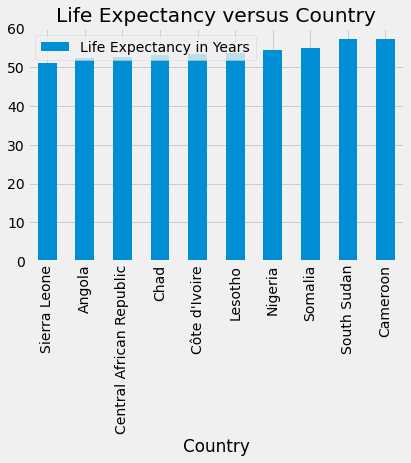

In [13]:
### bar plot
df2_Country = df2_sorted.loc[:, ['Country','Life expectancy ']].head(10)
plt.style.use('fivethirtyeight')
df2_Country.columns = ['Country','Life Expectancy in Years']
df2_Country.plot(x = "Country", y = "Life Expectancy in Years", kind ="bar", title="Life Expectancy versus Country")

In [14]:
### Final Step:  print the three model performance metrics
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 2.374324324324321
Mean Squared Error: 12.26340135135133
Root Mean Squared Error: 3.501913955446554
